In [1]:
library(Seurat)
library(ggplot2)
library(cowplot)
library(RColorBrewer)
library(crunch)
library(testSctpa)
library(openxlsx)

Attaching SeuratObject

Attaching sp


Attaching package: ‘crunch’


The following object is masked from ‘package:ggplot2’:

    resolution


The following object is masked from ‘package:sp’:

    dimensions


The following objects are masked from ‘package:stats’:

    filter, rstandard, setNames


The following object is masked from ‘package:graphics’:

    title


The following object is masked from ‘package:utils’:

    write.csv


The following object is masked from ‘package:base’:

    table




In [2]:
SIGNATURES_PATH = './results//publication/Supplementary Table 3.xlsx'
META_PATH = './results//publication/meta//allCells_meta.csv'
TCELL_COUNT_PATH = './results//step2_subClustering//Tcell/count.rds'
BCELL_COUNT_PATH = './results//step2_subClustering//Bcell/count.rds'

In [3]:
sigs = read.xlsx(SIGNATURES_PATH)

In [4]:
Tex = as.character(sigs[1,4:ncol(sigs)])
Tex = Tex[!is.na(Tex)]
ImmuRes = as.character(sigs[2,4:ncol(sigs)])
ImmuRes = ImmuRes[!is.na(ImmuRes)]
progenitor = as.character(sigs[3,4:ncol(sigs)])
progenitor = progenitor[!is.na(progenitor)]
terminal = as.character(sigs[4,4:ncol(sigs)])
terminal = terminal[!is.na(terminal)]

In [5]:
gsets = vector(mode='list')
gsets[['T cell exxhaustion']] = Tex
gsets[['T cell mediated immune response to tumor cell']] = ImmuRes
gsets[['Progenitor Exhausted CD8']] = progenitor
gsets[['Terminally Exhausted CD8']] = terminal
gsets[['tumorReactTIL']]=c('ENTPD1','CXCL13','HLA-DRA')

## T cell signatures
* calculated by Vision wrapped in [testSctpa](https://github.com/zgyaru/testSctpa)

In [6]:
count = readRDS(TCELL_COUNT_PATH)

In [ ]:
score = calVision(count, gSets = gsets)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 7.1 GiB”


In [ ]:
meta = read.csv(META_PATH,row.names=1)
head(meta)

In [ ]:
plot_data = data.frame(t(as.matrix(score)))
plot_data$cellType = meta[colnames(count),'subCluster']
plot_data$treat_group = factor(meta[colnames(count),'treat_group'],levels = c('Pre_NCR','Pre_CR','Post_NCR','Post_CR'))
plot_data$treat = factor(meta[colnames(count),'treat'],levels = c('Pre','Post'))
plot_data$group = factor(meta[colnames(count),'group'],levels = c('NCR','CR'))
colnames(plot_data) = gsub('\\.',' ',colnames(plot_data))

In [ ]:
colnames(plot_data) = c('T cell exhaustion','T cell mediated immune response to tumor cell',colnames(plot_data)[3:ncol(plot_data)])

### Figure 2B
* T cell exhuastion
* T cell mediated immune response to tumor cell

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(plot_data[plot_data$cellType %in% c('CD8+ Tex-SPRY1','CD8+ Tex-XAF1','CD4+ Tex-CXCL13'),],
       aes(x=cellType,y=`T cell exhaustion`,fill=treat))+
  geom_boxplot(width=0.6,outlier.size = 0,outlier.stroke=0)+
  scale_fill_manual(values=c('#80BAB9','#E9B427'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(plot_data[plot_data$cellType %in% c('CD8+ Tex-SPRY1','CD8+ Tex-XAF1','CD4+ Tex-CXCL13'),],
       aes(x=cellType,y=`T cell mediated immune response to tumor cell`,fill=treat))+
  geom_boxplot(width=0.6,outlier.size = 0,outlier.stroke=0)+
  scale_fill_manual(values=c('#80BAB9','#E9B427'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

### Figure 2D


In [ ]:
plot_data$prog_term = plot_data$`Progenitor Exhausted CD8` / plot_data$`Terminally Exhausted CD8`

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(plot_data[plot_data$cellType %in% c('CD8+ Tex-SPRY1','CD8+ Tex-XAF1'),],
       aes(x=cellType,y=prog_term,fill=cellType))+
  geom_boxplot(width=0.6,outlier.size = 0,outlier.stroke=0)+
  ggtitle('Progenitor Exhausted Signature vs. Terminally Exhausted Signature')+
  scale_fill_manual(values=c('#F4AF63','#ED7C61'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))+ylim(0,3)

### Figure S2D
Signature expression (CD39 (ENTPD1), CXCL13, HLA-DR) in all T cell clusters.

In [ ]:
options(repr.plot.width=6, repr.plot.height=5)
ggplot(plot_data[which(plot_data$cellType != 'Tprf-MKI67'),],
       aes(x=cellType,y=tumorReactTIL,fill=cellType))+
  geom_boxplot(outlier.size = 0)+
  #scale_fill_manual(values=c('#80BAB9','#E9B427'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = -1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

## B cell signatures
* calculated by Vision wrapped in [testSctpa](https://github.com/zgyaru/testSctpa)

In [56]:
gsets = list(TLS = c('CCL19', 'CCL21', 'CXCL13', 'CCR7', 'SELL', 'LAMP3', 'CXCR4', 'CD86', 'BCL6'))

In [57]:
b_count = readRDS(BCELL_COUNT_PATH)

In [62]:
b_score = calVision(b_count, gSets = gsets)

In [65]:
plot_data = data.frame(t(as.matrix(b_score)))
plot_data$cellType = meta[colnames(b_count),'subCluster']
plot_data$treat_group = factor(meta[colnames(b_count),'treat_group'],levels = c('Pre_CR','Post_CR','Pre_NCR','Post_NCR'))
plot_data$treat = factor(meta[colnames(b_count),'treat'],levels = c('Pre','Post'))
plot_data$group = factor(meta[colnames(b_count),'group'],levels = c('NCR','CR'))
colnames(plot_data) = gsub('\\.',' ',colnames(plot_data))
head(plot_data)

,TLS,cellType,treat_group,treat,group
,<dbl>,<chr>,<fct>,<fct>,<fct>
AAACGAAAGTCAGCGA-1-Pre-A,0.6019899,Bmem,Pre_NCR,Pre,NCR
AAAGAACCAATTGCTG-1-Pre-A,0.8563765,Bmem,Pre_NCR,Pre,NCR
AAAGAACCACACCGCA-1-Pre-A,0.5368269,Bmem,Pre_NCR,Pre,NCR
AAAGGATGTAATTGGA-1-Pre-A,0.5697201,Bmem,Pre_NCR,Pre,NCR
AAAGGATGTTGGAGGT-1-Pre-A,-0.1794551,Bmem,Pre_NCR,Pre,NCR
AAAGTCCTCCTAGAGT-1-Pre-A,1.4124441,Bmem,Pre_NCR,Pre,NCR


### Figure 6D

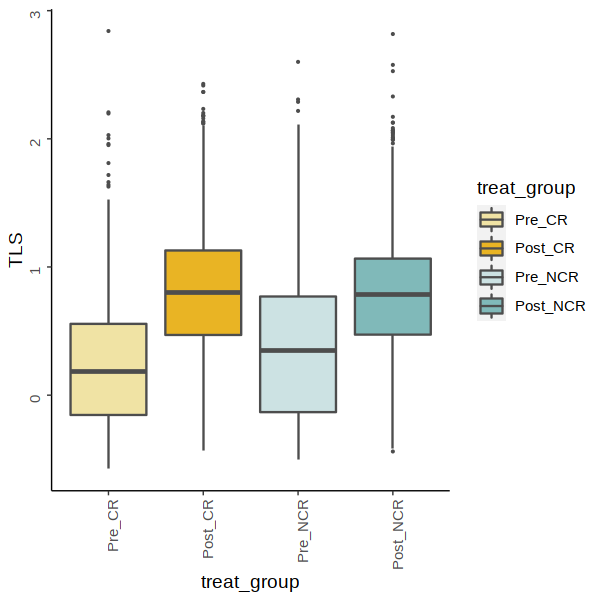

In [69]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(plot_data,
       aes(x=treat_group,y=TLS,fill=treat_group))+
  geom_boxplot(colour='gray30',width=0.8,outlier.size = 0.1)+
  scale_fill_manual(values = c("#F0E3A4", "#E9B424", "#CCE2E3", "#80B9B9"))+
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

### Figure 6E

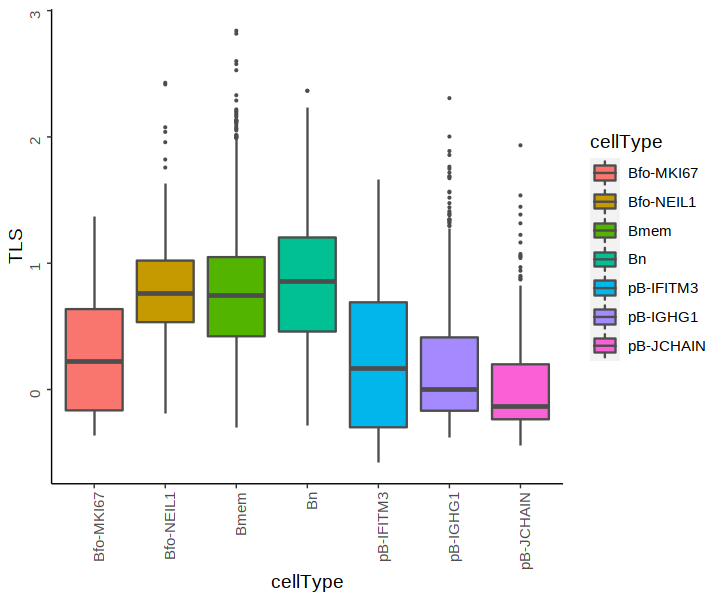

In [71]:
options(repr.plot.width=6, repr.plot.height=5)
ggplot(plot_data,
       aes(x=cellType,y=TLS,fill=cellType))+
  geom_boxplot(colour='gray30',width=0.8,outlier.size = 0.1)+
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))